In [12]:
# !pip install pandas scikit-learn
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 435.7 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 7.0 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.7 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 3.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 3.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 3.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 2.9 MB/s eta 0:00:03
   ----- ----------

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [58]:
train_data = pd.read_csv('./train.csv', parse_dates=['date'], infer_datetime_format=True)
test_data = pd.read_csv('./test.csv')

C:\Users\91993\AppData\Local\Temp\ipykernel_14256\3767588688.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train_data = pd.read_csv('./train.csv', parse_dates=['date'], infer_datetime_format=True)


In [59]:
train_data.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [60]:
temp_data = train_data[["date", "sales"]].groupby(["date"]).sum().reset_index()

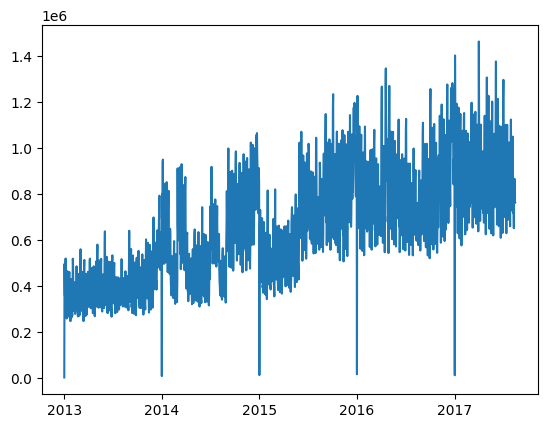

In [61]:
plt.plot(temp_data["date"], temp_data["sales"])

In [62]:
train_data["family"].value_counts()

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [65]:
store_sales = train_data.copy()
store_sales = store_sales.set_index("date").to_period("D")
store_salse = store_sales.set_index(["store_nbr", "family"], append=True)
store_sales

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [82]:
store_sales = train_data.copy()
average_sales = store_sales[["date", "sales"]].set_index('date').groupby(['date']).mean().reset_index()

In [77]:
len(train_data["store_nbr"].unique())

54

In [78]:
len(train_data["date"].unique())

1684

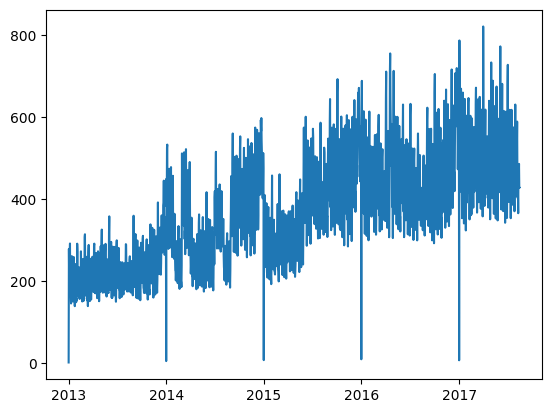

In [83]:
plt.plot(average_sales["date"], average_sales["sales"])

In [84]:
from sklearn.linear_model import LinearRegression

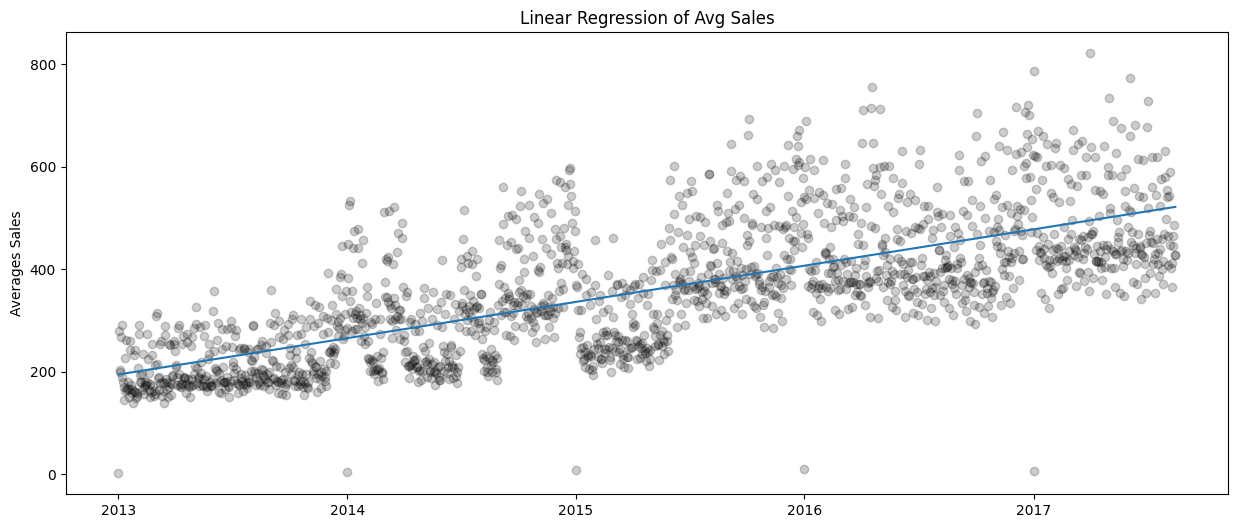

In [107]:
import datetime as dt

# Create a timestep feature
timesteps = average_sales[["date"]].map(dt.datetime.toordinal)

y = np.asarray(average_sales["sales"])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(timesteps, y)

# Make predictions
predictions = model.predict(timesteps)

# Plot the results
plt.figure(figsize=(15, 6))
plt.scatter(timesteps.map(dt.datetime.fromordinal), y, marker="o", alpha=0.2, c="black")
plt.plot(timesteps.map(dt.datetime.fromordinal), predictions)
plt.title(label="Linear Regression of Avg Sales")
plt.ylabel(ylabel="Averages Sales")
plt.show()

In [108]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

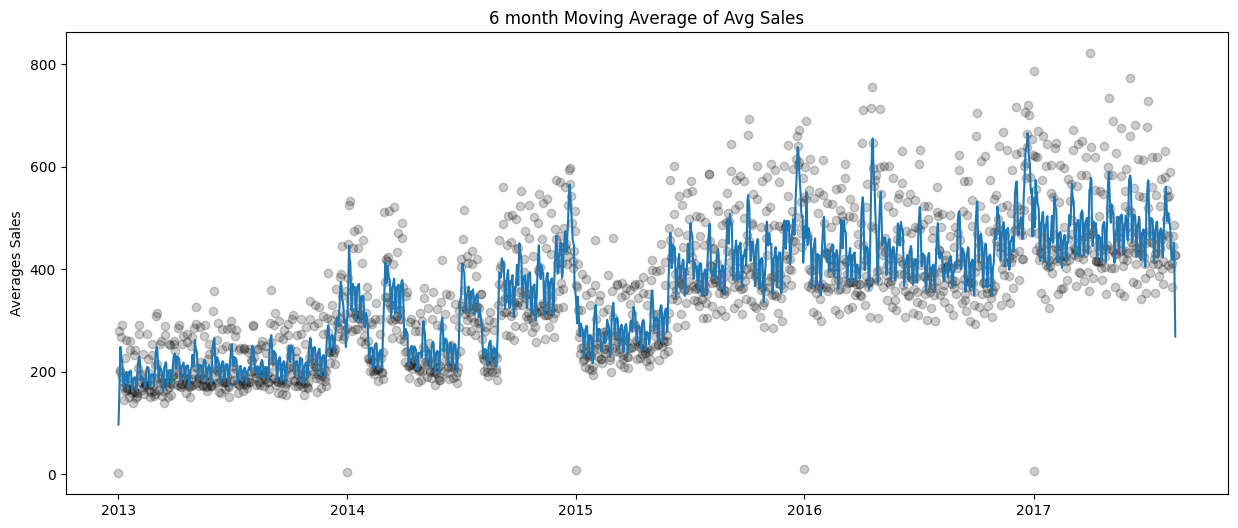

In [115]:
# Create a timestep feature
timesteps = average_sales[["date"]].map(dt.datetime.toordinal)

y = np.asarray(average_sales["sales"])

y_av = movingaverage(y, 5)

# Plot the results
plt.figure(figsize=(15, 6))
plt.scatter(timesteps.map(dt.datetime.fromordinal), y, marker="o", alpha=0.2, c="black")
plt.plot(timesteps.map(dt.datetime.fromordinal), y_av)
plt.title(label="6 month Moving Average of Avg Sales")
plt.ylabel(ylabel="Averages Sales")
plt.show()

In [182]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_sales.copy()

dp = DeterministicProcess(
    index = y['date'],
    constant=False,
    order = 3
)

X = dp.in_sample()

X_fore = dp.out_of_sample(90)

model = LinearRegression()
model.fit(X, y.sales)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

X_fore

c:\Users\91993\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend,trend_squared,trend_cubed
1685,1685.0,2839225.0,4.784094e+09
1686,1686.0,2842596.0,4.792617e+09
1687,1687.0,2845969.0,4.801150e+09
1688,1688.0,2849344.0,4.809693e+09
1689,1689.0,2852721.0,4.818246e+09
...,...,...,...
1770,1770.0,3132900.0,5.545233e+09
1771,1771.0,3136441.0,5.554637e+09
1772,1772.0,3139984.0,5.564052e+09
1773,1773.0,3143529.0,5.573477e+09


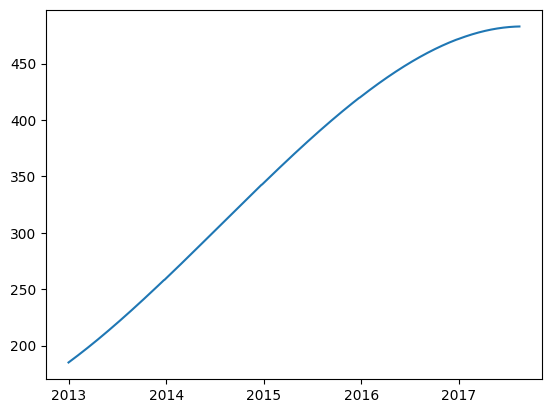

In [177]:
plt.plot(y['date'], y_pred)

In [178]:
def plotWithScatter (average_sales, predictions):
    # Create a timestep feature
    timesteps = average_sales[["date"]].map(dt.datetime.toordinal)

    y = np.asarray(average_sales["sales"])

    # Plot the results
    plt.figure(figsize=(15, 6))
    plt.plot(timesteps.map(dt.datetime.fromordinal), predictions)
    plt.scatter(timesteps.map(dt.datetime.fromordinal), y, marker="o", alpha=0.2, c="black")
    plt.title(label="Linear Regression of Avg Sales")
    plt.ylabel(ylabel="Averages Sales")
    plt.show()

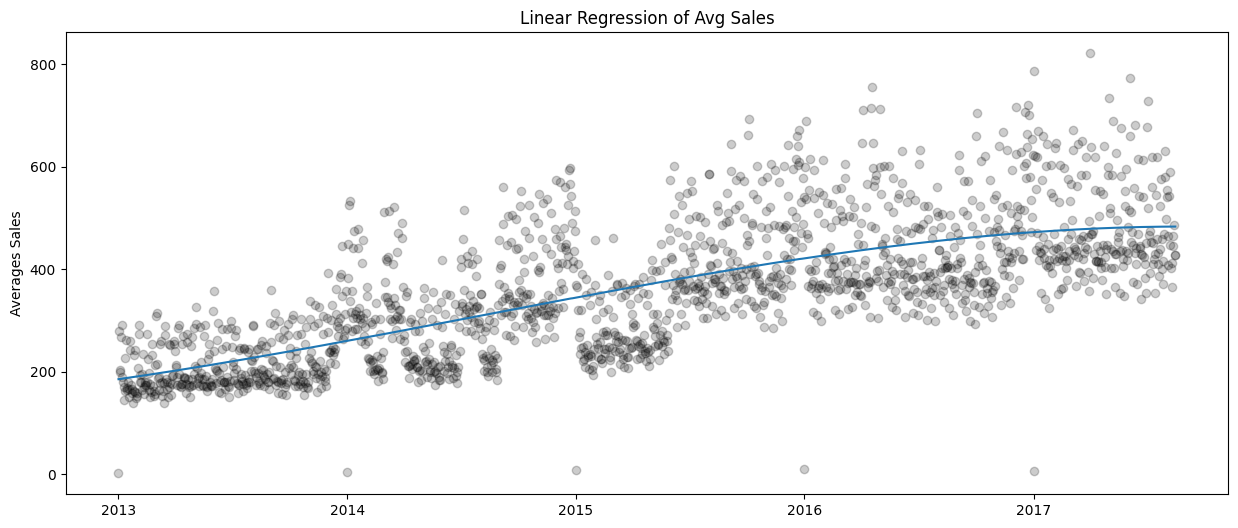

In [179]:
plotWithScatter(average_sales, y_pred)